# Exploratory Data Analysis

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
# plt.style.use('ggplot')
font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 22 }
plt.rc('font', **font)

In [3]:
from IPython.core.pylabtools import figsize
figsize(14, 7)

## Read data

In [4]:
data_path = '../../data/'

In [5]:
df = pd.read_csv(os.path.join(data_path, 'SF_Datathon_Data.csv'), index_col='id')

In [6]:
df.head()

,Name,Age,Gender,Qualification_type,Job_Type,Race,GPA,Interviewed
id,,,,,,,,
1,Jody Tree,29,M,3,Marketing,White,3.7,True
2,Rowan Adan,59,M,2,Marketing,Latino,1.0,False
3,Caryl MacCall,56,M,1,Training,Other,4.0,False
4,Gordy Wornham,51,M,2,Business Development,Black,3.0,False
5,Abraham Feldfisher,46,M,1,Support,Latino,1.0,True


In [7]:
df.shape

(7000, 8)

In [8]:
list(df.columns)

['Name',
 'Age',
 'Gender',
 'Qualification_type',
 'Job_Type',
 'Race',
 'GPA',
 'Interviewed']

In [9]:
'Number of rows: {:,}'.format(df.shape[0])

'Number of rows: 7,000'

In [10]:
df.dtypes

Name                   object
Age                     int64
Gender                 object
Qualification_type      int64
Job_Type               object
Race                   object
GPA                   float64
Interviewed              bool
dtype: object

In [11]:
df.isnull().mean()

Name                  0.000143
Age                   0.000000
Gender                0.004571
Qualification_type    0.000000
Job_Type              0.000000
Race                  0.001000
GPA                   0.000000
Interviewed           0.000000
dtype: float64

## Features

* id: Applicant ID
* Name: Applicant name
* Gender: Applicant Gender
* Qualification: Value 1-5 (See description below)
* Job Type: Job area applied for
* Race: Applicant race
* GPA: Applicant GPA
* Interviewed: TRUE or FALSE

### Age

In [12]:
df['Age'].describe()

count    7000.000000
mean       40.687143
std        11.546033
min        21.000000
25%        31.000000
50%        41.000000
75%        51.000000
max        60.000000
Name: Age, dtype: float64

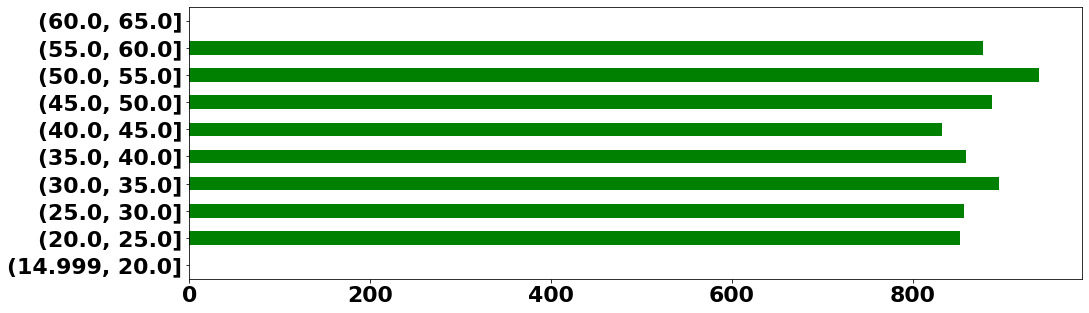

In [13]:
fig = pd.cut(df['Age'], bins=range(15, 70, 5), include_lowest=True).\
    value_counts(sort=False).plot.barh(rot=0, color="g", figsize=(16, 5))

In [14]:
fig.get_figure().savefig('../../figures/EDA_Age.png', bbox_inches="tight")

### Gender

In [15]:
df['Gender'].value_counts(dropna=False)

M      3489
F      3472
NaN      32
X         7
Name: Gender, dtype: int64

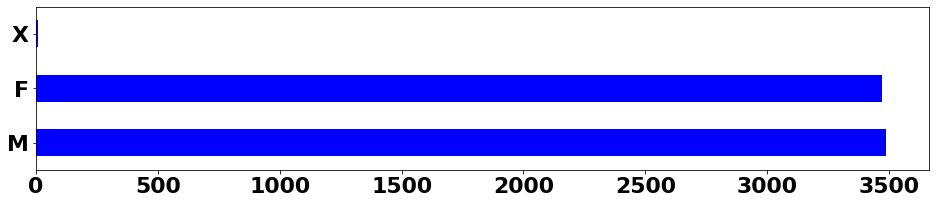

In [16]:
fig = pd.value_counts(df['Gender'].values, sort=True).plot.barh(
    figsize=(16, 3), 
    color='b')

In [17]:
fig.get_figure().savefig('../../figures/EDA_Gender.png', bbox_inches="tight")

### Qualification type

* 1 = Bachelors Degree
* 2 = Masters Degree
* 3 = Doctorate
* 4 = Diploma
* 5 = Other

In [18]:
df['Qualification_type'].value_counts(dropna=False)

5    1425
3    1421
1    1391
2    1383
4    1380
Name: Qualification_type, dtype: int64

In [19]:
types = {
    1: 'Bachelors Degree',
    2: 'Masters Degree',
    3: 'Doctorate',
    4: 'Diploma',
    5: 'Other'
}

In [20]:
types

{1: 'Bachelors Degree',
 2: 'Masters Degree',
 3: 'Doctorate',
 4: 'Diploma',
 5: 'Other'}

In [21]:
list(types.keys())

[1, 2, 3, 4, 5]

In [22]:
list(types.values())

['Bachelors Degree', 'Masters Degree', 'Doctorate', 'Diploma', 'Other']

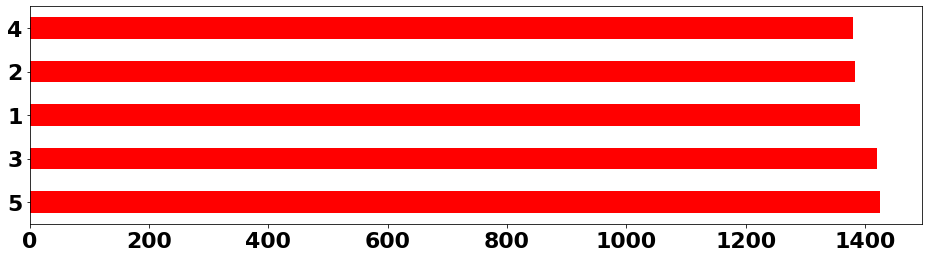

In [23]:
fig = pd.value_counts(df['Qualification_type'].values, sort=True).plot.barh(
    figsize=(16, 4), 
    color='r')

In [24]:
ordered = list(pd.value_counts(df['Qualification_type'].values, sort=True).keys())

In [25]:
ordered

[5, 3, 1, 2, 4]

In [26]:
keys_ordered = [ types[key] for key in ordered ]

In [27]:
keys_ordered

['Other', 'Doctorate', 'Bachelors Degree', 'Masters Degree', 'Diploma']

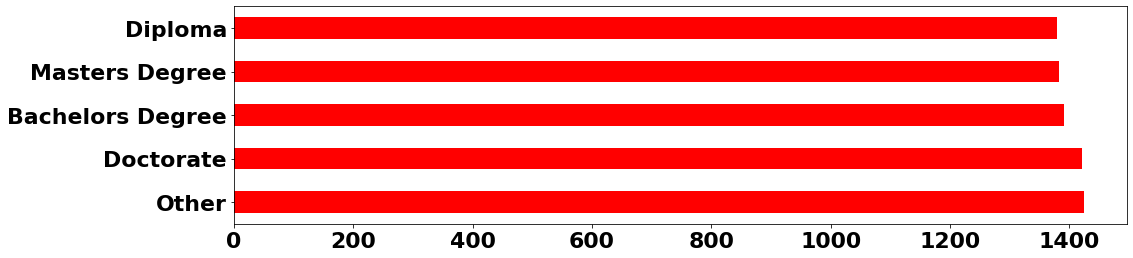

In [28]:
fig = pd.value_counts(df['Qualification_type'].values, sort=True).plot.barh(
    figsize=(16, 4), 
    color='r')
plt.yticks(range(5), keys_ordered)
plt.show()

In [29]:
fig.get_figure().savefig('../../figures/EDA_Qualification_type.png', bbox_inches="tight")

### Race


In [30]:
df['Race'].value_counts(dropna=False)

Latino    1424
Other     1397
Asian     1396
White     1394
Black     1382
NaN          7
Name: Race, dtype: int64

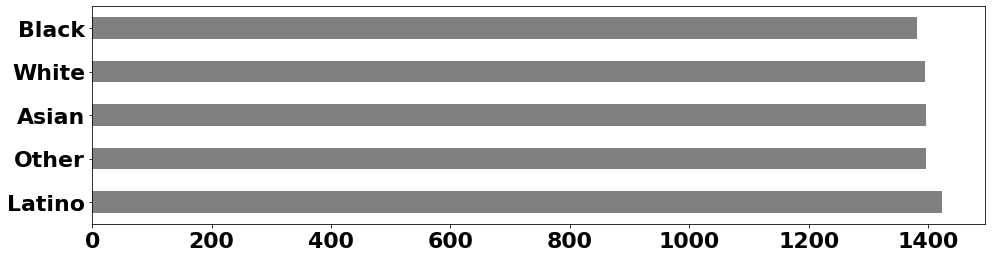

In [31]:
fig = pd.value_counts(df['Race'].values, sort=True).plot.barh(
    figsize=(16, 4), 
    color='grey')

In [32]:
fig.get_figure().savefig('../../figures/EDA_Race.png', bbox_inches="tight")

### Job Type

In [33]:
df['Job_Type'].value_counts(dropna=False)

Services                    615
Human Resources             612
Engineering                 607
Business Development        589
Product Management          585
Support                     583
Research and Development    579
Accounting                  575
Legal                       575
Sales                       568
Training                    564
Marketing                   548
Name: Job_Type, dtype: int64

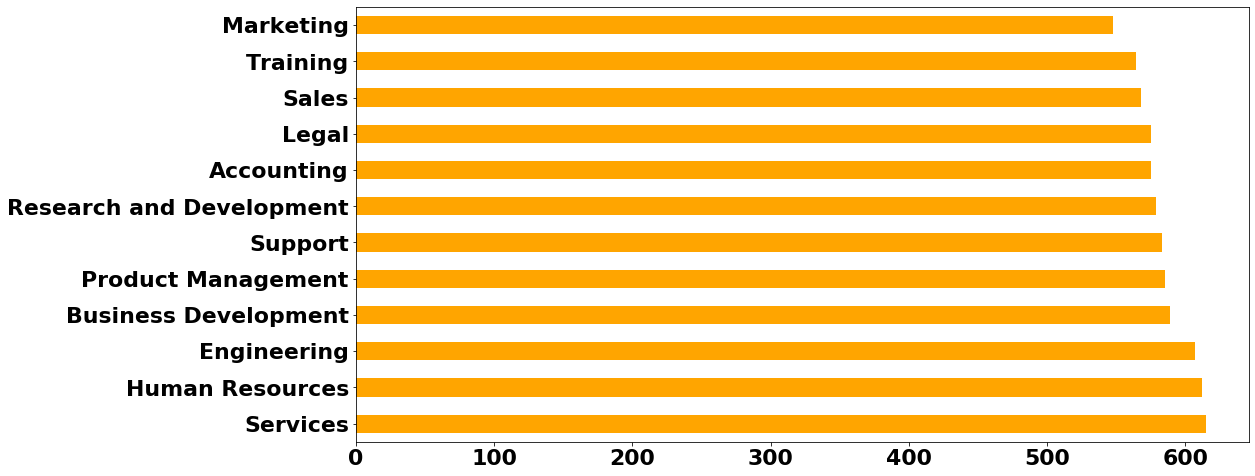

In [34]:
fig = pd.value_counts(df['Job_Type'].values, sort=True).plot.barh(
    figsize=(16, 8), 
    color='orange')

In [35]:
fig.get_figure().savefig('../../figures/EDA_Job_Type.png', bbox_inches="tight")

### Interviewed

In [36]:
df['Interviewed'].value_counts(dropna=False)

True     3548
False    3452
Name: Interviewed, dtype: int64

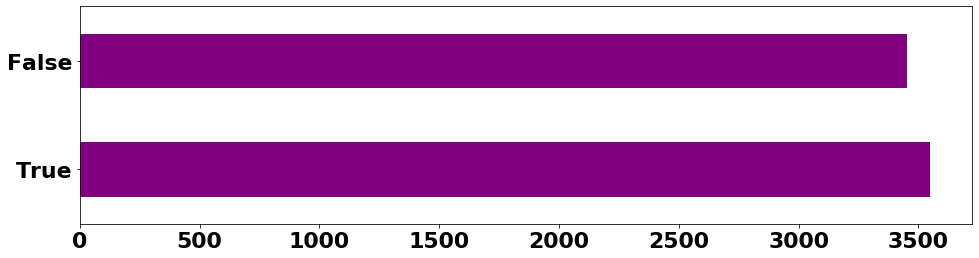

In [37]:
fig = pd.value_counts(df['Interviewed'].values, sort=True).plot.barh(
    figsize=(16, 4), 
    color='purple')

## Describe Features

In [38]:
df[['Age', 'GPA']].describe()

,Age,GPA
count,7000.000000,7000.000000
mean,40.687143,2.135629
std,11.546033,1.196477
min,21.000000,0.000000
25%,31.000000,1.000000
50%,41.000000,2.000000
75%,51.000000,3.000000
max,60.000000,4.000000


In [39]:
df.groupby('Interviewed')[['Age', 'GPA']].describe().T

Interviewed        False        True 
Age count    3452.000000  3548.000000
    mean       40.776651    40.600056
    std        11.568084    11.525501
    min        21.000000    21.000000
    25%        31.000000    31.000000
    50%        41.000000    41.000000
    75%        51.000000    51.000000
    max        60.000000    60.000000
GPA count    3452.000000  3548.000000
    mean        2.123117     2.147802
    std         1.204947     1.188223
    min         0.000000     0.000000
    25%         1.000000     1.300000
    50%         2.000000     2.000000
    75%         3.300000     3.000000
    max         4.000000     4.000000

### Gender

In [40]:
df.groupby(['Gender'])['Interviewed'].count()

Gender
F    3472
M    3489
X       7
Name: Interviewed, dtype: int64

In [41]:
df.groupby(['Gender'])['Interviewed'].sum()

Gender
F    1774.0
M    1760.0
X       5.0
Name: Interviewed, dtype: float64

### Race

In [42]:
df.groupby(['Race'])['Interviewed'].count()

Race
Asian     1396
Black     1382
Latino    1424
Other     1397
White     1394
Name: Interviewed, dtype: int64

In [43]:
df.groupby(['Race'])['Interviewed'].sum()

Race
Asian     706.0
Black     706.0
Latino    710.0
Other     712.0
White     712.0
Name: Interviewed, dtype: float64

### GPA

In [44]:
df.groupby(['GPA'])['Interviewed'].count()

GPA
0.0    565
0.7    606
1.0    618
1.3    564
1.7    594
2.0    588
2.3    587
2.7    552
3.0    578
3.3    581
3.7    572
4.0    595
Name: Interviewed, dtype: int64

In [45]:
df.groupby(['GPA'])['Interviewed'].sum()

GPA
0.0    277.0
0.7    300.0
1.0    298.0
1.3    290.0
1.7    310.0
2.0    306.0
2.3    304.0
2.7    285.0
3.0    294.0
3.3    284.0
3.7    305.0
4.0    295.0
Name: Interviewed, dtype: float64